<h1 style="color:green; text-align:center"> The Winning Effect: An Analysis of the Correlation between MLS Win/Loss Ratios and Attendance Numbers
<h5 style="color:green; text-align:center; font-family: forte"> Name: Curtis Rogers </h5>
<h5 style="color:green; text-align:center; font-family:forte"> Date: 7/16/2024 </h5>


In [39]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt


<h5 style="color:blue; text-align:left; font-family:forte"> Section 1: Load MLS Attendance csv </h5>

In [32]:
attendance = pd.read_csv("MLS-Attendance.csv")

attendance.describe()

,StadiumCapacity,TotalSpectators,AverageAttendance,Matches,Capacity %,Year
count,474.000000,474.000000,474.000000,474.000000,474.000000,474.000000
mean,24.094781,269.359414,18.172346,14.675105,0.774646,2012.234177
std,9.494408,132.049413,7.164049,4.112058,0.212460,7.949232
min,17.417000,0.000000,0.000000,0.000000,0.000000,1996.000000
25%,20.000000,206.777250,14.541500,15.000000,0.660000,2006.000000
50%,21.000000,260.060500,17.166500,16.000000,0.794500,2014.000000
75%,25.000000,328.681500,20.497750,17.000000,0.911000,2019.000000
max,75.412000,901.033000,53.002000,17.000000,1.617000,2023.000000


<h5 style="color:blue; text-align:left; font-family:forte"> Section 2: Load MLS Regular Season Statistics csv </h5>

In [33]:
stats = pd.read_csv("MLS-Data.csv")

stats.describe()



,GamesPlayed,TotalPoints,TotalWins,TotalLosses,Draws,Goals,GoalsAgainst,GoalsDifferential,PenaltyKickTaken,PenaltyKickConceded,Fouls,FoulsSuffered,Offsides,YellowCards,RedCards,Year
count,474.000000,474.000000,474.000000,474.000000,474.000000,474.000000,474.000000,474.000000,474.000000,474.000000,474.000000,474.000000,474.000000,474.000000,474.000000,474.000000
mean,32.050633,43.696203,12.312236,12.312236,7.421941,45.962025,45.962025,0.000000,5.244726,5.921941,413.552743,394.808017,75.337553,57.348101,3.687764,2012.234177
std,3.024489,10.666009,3.761322,4.033630,3.663318,10.247190,10.327954,13.880645,2.373930,5.109811,62.942727,60.632284,23.813138,11.530781,2.045874,7.949232
min,18.000000,14.000000,3.000000,4.000000,0.000000,12.000000,20.000000,-44.000000,0.000000,0.000000,201.000000,183.000000,21.000000,30.000000,0.000000,1996.000000
25%,30.000000,37.000000,10.000000,9.250000,5.000000,39.000000,39.000000,-8.000000,4.000000,3.000000,376.250000,362.000000,57.000000,50.000000,2.000000,2006.000000
50%,34.000000,44.000000,12.000000,12.000000,8.000000,45.000000,45.000000,0.500000,5.000000,5.000000,417.000000,394.000000,74.000000,56.000000,3.000000,2014.000000
75%,34.000000,51.000000,15.000000,15.000000,10.000000,52.000000,53.000000,9.750000,7.000000,7.000000,456.000000,428.000000,90.750000,65.000000,5.000000,2019.000000
max,34.000000,73.000000,24.000000,25.000000,18.000000,85.000000,75.000000,48.000000,14.000000,31.000000,618.000000,590.000000,149.000000,92.000000,11.000000,2023.000000


<h5 style="color:blue; text-align:left; font-family:forte"> Section 3: Merge both Files into on DataFrame </h5>

In [34]:
merged_df = pd.merge(stats, attendance, on=['Club','Year'], how='left')

merged_df.describe()

,GamesPlayed,TotalPoints,TotalWins,TotalLosses,Draws,Goals,GoalsAgainst,GoalsDifferential,PenaltyKickTaken,PenaltyKickConceded,...,FoulsSuffered,Offsides,YellowCards,RedCards,Year,StadiumCapacity,TotalSpectators,AverageAttendance,Matches,Capacity %
count,474.000000,474.000000,474.000000,474.000000,474.000000,474.000000,474.000000,474.000000,474.000000,474.000000,...,474.000000,474.000000,474.000000,474.000000,474.000000,474.000000,474.000000,474.000000,474.000000,474.000000
mean,32.050633,43.696203,12.312236,12.312236,7.421941,45.962025,45.962025,0.000000,5.244726,5.921941,...,394.808017,75.337553,57.348101,3.687764,2012.234177,24.094781,269.359414,18.172346,14.675105,0.774646
std,3.024489,10.666009,3.761322,4.033630,3.663318,10.247190,10.327954,13.880645,2.373930,5.109811,...,60.632284,23.813138,11.530781,2.045874,7.949232,9.494408,132.049413,7.164049,4.112058,0.212460
min,18.000000,14.000000,3.000000,4.000000,0.000000,12.000000,20.000000,-44.000000,0.000000,0.000000,...,183.000000,21.000000,30.000000,0.000000,1996.000000,17.417000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,37.000000,10.000000,9.250000,5.000000,39.000000,39.000000,-8.000000,4.000000,3.000000,...,362.000000,57.000000,50.000000,2.000000,2006.000000,20.000000,206.777250,14.541500,15.000000,0.660000
50%,34.000000,44.000000,12.000000,12.000000,8.000000,45.000000,45.000000,0.500000,5.000000,5.000000,...,394.000000,74.000000,56.000000,3.000000,2014.000000,21.000000,260.060500,17.166500,16.000000,0.794500
75%,34.000000,51.000000,15.000000,15.000000,10.000000,52.000000,53.000000,9.750000,7.000000,7.000000,...,428.000000,90.750000,65.000000,5.000000,2019.000000,25.000000,328.681500,20.497750,17.000000,0.911000
max,34.000000,73.000000,24.000000,25.000000,18.000000,85.000000,75.000000,48.000000,14.000000,31.000000,...,590.000000,149.000000,92.000000,11.000000,2023.000000,75.412000,901.033000,53.002000,17.000000,1.617000


<h5 style="color:blue; text-align:left; font-family:forte"> Section 4: DataFrame Transformations </h5>
<p style="color:orange; text-align:left; font-family:Comic Sans Ms;font-size:11px"> For this project a Few transformations needed to be made to complete the over

In [35]:
merged_df['Win/lossRatio'] = merged_df['TotalWins'] / merged_df['TotalLosses']
merged_df['Club'] = merged_df['Club'].astype("string")

merged_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 474 entries, 0 to 473
Data columns (total 24 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Club                 474 non-null    string 
 1   GamesPlayed          474 non-null    int64  
 2   TotalPoints          474 non-null    int64  
 3   TotalWins            474 non-null    int64  
 4   TotalLosses          474 non-null    int64  
 5   Draws                474 non-null    int64  
 6   Goals                474 non-null    int64  
 7   GoalsAgainst         474 non-null    int64  
 8   GoalsDifferential    474 non-null    int64  
 9   PenaltyKickTaken     474 non-null    int64  
 10  PenaltyKickConceded  474 non-null    int64  
 11  Fouls                474 non-null    int64  
 12  FoulsSuffered        474 non-null    int64  
 13  Offsides             474 non-null    int64  
 14  YellowCards          474 non-null    int64  
 15  RedCards             474 non-null    int

In [36]:
merged_df = merged_df[merged_df.Year != 2020]

merged_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 448 entries, 0 to 473
Data columns (total 24 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Club                 448 non-null    string 
 1   GamesPlayed          448 non-null    int64  
 2   TotalPoints          448 non-null    int64  
 3   TotalWins            448 non-null    int64  
 4   TotalLosses          448 non-null    int64  
 5   Draws                448 non-null    int64  
 6   Goals                448 non-null    int64  
 7   GoalsAgainst         448 non-null    int64  
 8   GoalsDifferential    448 non-null    int64  
 9   PenaltyKickTaken     448 non-null    int64  
 10  PenaltyKickConceded  448 non-null    int64  
 11  Fouls                448 non-null    int64  
 12  FoulsSuffered        448 non-null    int64  
 13  Offsides             448 non-null    int64  
 14  YellowCards          448 non-null    int64  
 15  RedCards             448 non-null    int64  


In [37]:
merged_df.to_csv('merged_data.csv', index=False)

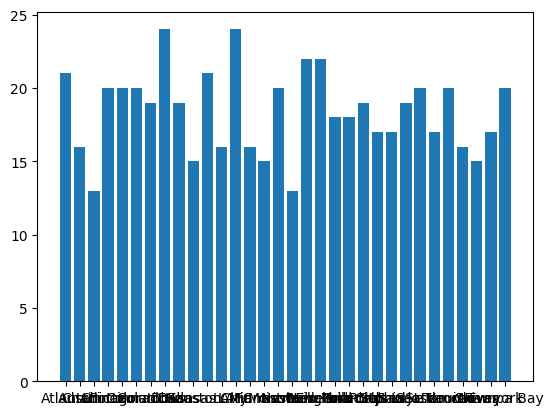

In [53]:
attendance = merged_df['AverageAttendance']
wins = merged_df['TotalWins']
loses =merged_df['TotalLosses']
year = merged_df['Year']
club = merged_df['Club']
plt.bar(club, wins )
plt.show()
